In [1]:
import sncosmo
from ztf_supernova import load_sn
from refiner import Refiner

In [2]:
ztfname = "ZTF18abvtcyi"
source = "hsiao"
source = "nugent-sn1a"
source = "nugent-sn91bg"
data, z, mwebv, t0 = load_sn(ztfname)

refiner = Refiner(data, source, z, mwebv, phase_range=(-10, 85))
refiner.match_sed(t0)

In [4]:
result, fitted_model = sncosmo.fit_lc(
    refiner.phot.data, refiner.sed.model,
    ['t0', 'amplitude'],  # parameters of model to vary
    #bounds={'z':(0.3, 0.7)}
)

In [7]:
result

      success: True
      message: 'Minimization exited successfully.'
        ncall: 43
        chisq: 71594.22559918113
         ndof: 106
  param_names: ['z', 't0', 'amplitude', 'mwebv', 'mwr_v']
   parameters: array([5.39910300e-02, 5.83583741e+04, 1.26139340e-07, 3.99575200e-02,
       3.10000000e+00])
 vparam_names: ['t0', 'amplitude']
   covariance: array([[2.60273602e-04, 4.92766309e-13],
       [4.92766309e-13, 2.89508637e-20]])
       errors: OrderedDict({'t0': 0.016132997268869076, 'amplitude': 1.7014953326767938e-10})
         nfit: 1
    data_mask: array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True

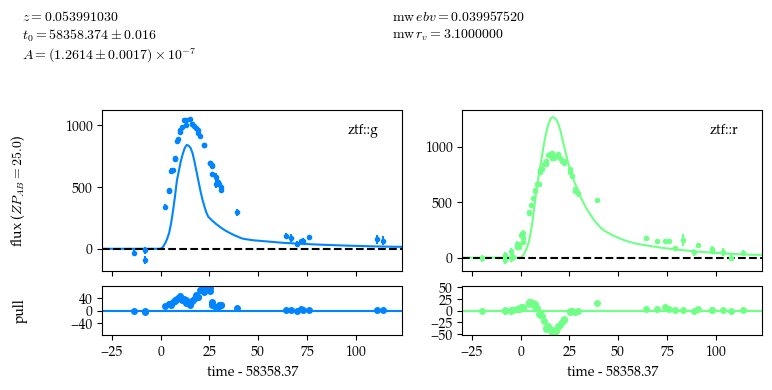

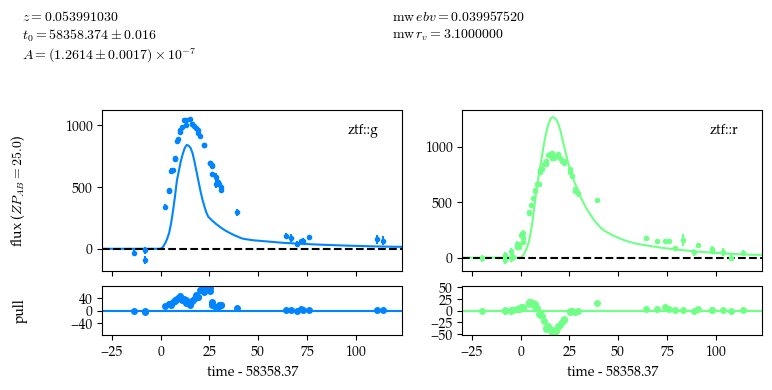

In [6]:
sncosmo.plot_lc(refiner.phot.data, model=fitted_model, errors=result.errors)

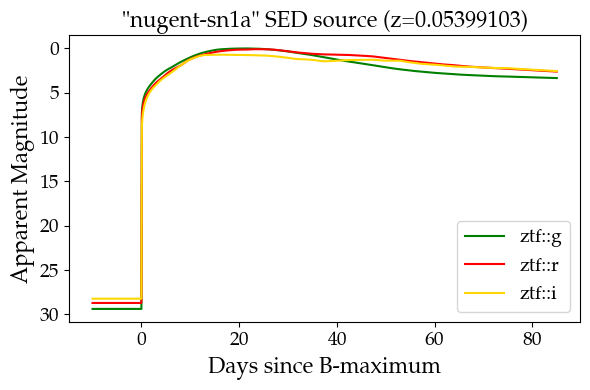

In [17]:
refiner.sed.plot_lightcurves()

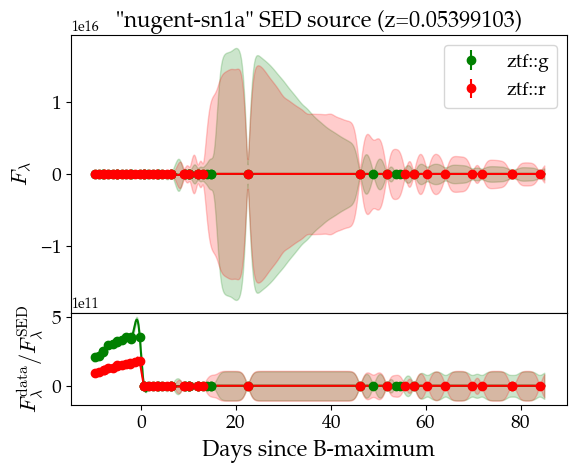

In [14]:
refiner.plot_fit()

/home/tomas/Softwares/kcorr/refiner.py:262: RuntimeWarning: invalid value encountered in log10
  colour = -2.5 * np.log10(f1 / f2) + (zp1 - zp2)
/home/tomas/Softwares/kcorr/refiner.py:273: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  fluxes = np.random.multivariate_normal(self.colour_flux_ratio[mask],
/home/tomas/Softwares/kcorr/refiner.py:283: RuntimeWarning: invalid value encountered in log10
  flux_ratio = -2.5 * np.log10(f1 / f2)


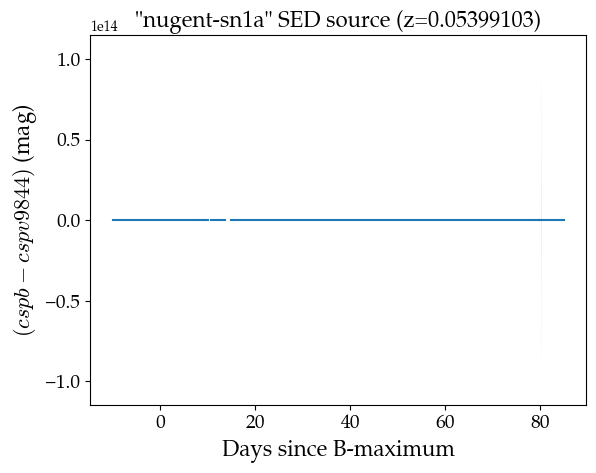

In [15]:
refiner.calculate_colour("cspb", "cspv9844")

In [8]:
refiner.st, refiner.st_err

(np.float64(1.0180933333333286), np.float64(0.1264436113231678))